In [1]:
import numpy as np
from tenpy.networks.mps import MPS
from tenpy.models.hubbard import FermiHubbardModel
from tenpy.algorithms import dmrg

import pickle, time
import matplotlib.pyplot as plt

In [21]:
def run_dmrg_half_filling(L, U, t, mu, chi_max, sweeps, hc_flag=False, charge=0):
    model_params = {
        'L': L,
        'U': U,
        't':t,
        'mu': mu,
        'bc_MPS': 'finite',
        'bc_x':'periodic',
        'explicit_plus_hc':hc_flag
    }

    model = FermiHubbardModel(model_params)

    # Initialize the MPS for half-filling with an alternating pattern of up and down spins
    if charge==0:
        initial_state = ['down', 'up'] * (L // 2) if L % 2 == 0 else ['down', 'up'] * (L // 2) + ['down']
    elif charge==1:
        initial_state = ['down', 'up'] * (L // 2) if L % 2 == 0 else ['down', 'up'] * (L // 2) + ['full']
        if L%2==0: initial_state[-1] = 'full'
    elif charge==-1:
        initial_state = ['down', 'up'] * (L // 2) if L % 2 == 0 else ['down', 'up'] * (L // 2) + ['empty']
        if L%2==0: initial_state[-1] = 'empty'
    psi = MPS.from_product_state(model.lat.mps_sites(), initial_state, bc='finite')

    dmrg_params = {
        'mixer': True,  # Enables mixing for better convergence in difficult phases
        'trunc_params': {
            'chi_max': chi_max,
            'svd_min': 1.e-6
        },
        'max_sweeps': sweeps,
    }

    eng = dmrg.TwoSiteDMRGEngine(psi, model, dmrg_params)
    E0, psi = eng.run()

    return E0 #, psi.expectation_value('Ntot')



In [22]:
# Parameters
L = 8  # Number of lattice sites (ensure it is even for a simple setup)
U = 4.0  # On-site interaction strength
t = np.exp(1j*np.pi*0.1)  # Hopping term
mu = U/2   # Chemical potential (often set to 0 for simplicity at half filling)
chi_max = 200  # Maximum bond dimension
sweeps = 100  # Number of DMRG sweeps



ground_state_energy = run_dmrg_half_filling(L, U, t, mu, chi_max, sweeps, charge=1)
print("Ground State Energy at Half Filling:", ground_state_energy/L)

Ground State Energy at Half Filling: -2.4630240638293848


In [67]:
ground_state_energy[1].sum()

9.000000000000004

In [23]:
# Example usage:
U = 4.0  # on-site interaction strength
t = 1.0  # hopping term
k_num = 10
mu = U/2 # chemical potential
chi_max = 400  # max bond dimension
sweeps = 50  # number of DMRG sweeps

U_list = np.array([0.1, 0.2, 0.5, 1, 2, 4, 6, 8])
norb_list = np.array([6, 8, 10, 12, 16, 20])

time_list = np.zeros(shape=(len(U_list), len(norb_list)))
#raw_energy_dat = np.zeros(shape=(len(U_list), len(norb_list), 2, k_num))
#obc_gap = np.zeros_like(time_list)
pbc_gap = np.zeros_like(time_list)
for i, U in enumerate(U_list):
    for j, norb in enumerate(norb_list):
        mu = U/2
        st_time = time.time()
        energy_arr = np.zeros(k_num)
        #for kx in range(-int(k_num/2), int(k_num/2)):
        #    t_star = np.exp(1j*kx/k_num*np.pi)
        #    raw_energy_dat[i,j,0,kx+int(k_num/2)] = run_dmrg_half_filling(norb, U, t_star, mu, chi_max, sweeps,charge=0)
        #    raw_energy_dat[i,j,1,kx+int(k_num/2)] = run_dmrg_half_filling(norb, U, t_star, mu, chi_max, sweeps,charge=1)
        pbc_gap[i,j] = 2*(run_dmrg_half_filling(norb, U, 1, mu, chi_max, sweeps,charge=1) - run_dmrg_half_filling(norb, U, t_star, mu, chi_max, sweeps,charge=0))
        time_list[i, j] = time.time() - st_time
        print(U, norb, time_list[i,j])

0.1 6 1.1839003562927246
0.1 8 6.524979829788208
0.1 10 13.190994501113892


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=2.11e-04


0.1 12 131.85403037071228


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=2.27e-05
final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=1.98e-05


0.1 16 290.01119089126587


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=3.60e-05
final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=8.34e-05


0.1 20 539.4601809978485
0.2 6 1.1979868412017822
0.2 8 6.512310981750488
0.2 10 15.70560359954834


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=2.81e-04


0.2 12 134.63492012023926


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=2.56e-05
final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=2.03e-04


0.2 16 356.97503209114075


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=3.86e-05
final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=2.60e-05


0.2 20 538.5236887931824
0.5 6 1.219024896621704
0.5 8 5.843310832977295
0.5 10 12.99603009223938


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=4.31e-05


0.5 12 100.42371940612793


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=2.80e-05
final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=5.03e-05


0.5 16 360.67724800109863


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=4.27e-05
final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=4.94e-04


0.5 20 536.9725167751312
1.0 6 1.2268381118774414
1.0 8 5.221132755279541
1.0 10 13.412033796310425


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=1.50e-05


1.0 12 38.67258834838867


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=2.01e-05
final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=1.83e-05


1.0 16 180.05446696281433


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=4.56e-05
final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=3.98e-05


1.0 20 419.69951844215393
2.0 6 1.239893913269043
2.0 8 5.132063627243042
2.0 10 13.389293432235718
2.0 12 41.148977518081665


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=1.63e-05
final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=1.00e-05


2.0 16 197.07127857208252


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=3.60e-05
final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=2.47e-05


2.0 20 412.94691276550293
4.0 6 1.2713654041290283
4.0 8 4.817270040512085
4.0 10 13.755091428756714
4.0 12 42.63125991821289


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=1.16e-05


4.0 16 125.70306062698364


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=4.17e-05


4.0 20 205.8803174495697
6.0 6 1.3396632671356201
6.0 8 4.833439350128174
6.0 10 15.925599575042725
6.0 12 68.40895438194275
6.0 16 252.692232131958


final DMRG state not in canonical form up to norm_tol=1.00e-05: norm_err=1.97e-05


6.0 20 389.8995141983032
8.0 6 1.36212158203125
8.0 8 4.944596529006958
8.0 10 15.869382381439209
8.0 12 36.323341608047485
8.0 16 214.8291540145874
8.0 20 391.72486996650696


In [8]:
data_dict = {}
data_dict['U_list'] = U_list
data_dict['norb_list'] = norb_list
data_dict['raw_energy'] = raw_energy_dat



# Your dictionary

# Saving the dictionary to a pickle file
#with open('Charge_gap_OHK_raw_set1.pkl', 'wb') as file:
#    pickle.dump(data_dict, file)

In [132]:
# Example usage:
U = 4.0  # on-site interaction strength
t = 1.0  # hopping term
k_num = 40
mu = U/2 # chemical potential
chi_max = 200  # max bond dimension
sweeps = 40  # number of DMRG sweeps

U_list = np.array([0.1])
mu_list = np.array([0])#np.linspace(U/2-1, U/2+1, 3)
norb = 4

time_list = np.zeros(shape=(len(U_list), len(mu_list)))
raw_energy_dat = np.zeros(shape=(len(U_list), len(mu_list), 3, k_num))

for i, U in enumerate(U_list):
    mu_list = np.array([0.05])#np.linspace(U/2-1, U/2+1, 3)
    for j, mu in enumerate(mu_list):
        st_time = time.time()
        energy_arr = np.zeros(k_num)
        for kx in range(-int(k_num/2), int(k_num/2)):
            t_star = np.exp(1j*kx/k_num*np.pi)
            raw_energy_dat[i,j,0,kx+int(k_num/2)] = run_dmrg_half_filling(norb, U, t_star, mu, chi_max, sweeps,charge=0)
            raw_energy_dat[i,j,1,kx+int(k_num/2)] = run_dmrg_half_filling(norb, U, t_star, mu, chi_max, sweeps,charge=1)
            raw_energy_dat[i,j,2,kx+int(k_num/2)] = run_dmrg_half_filling(norb, U, t_star, mu, chi_max, sweeps,charge=-1)
            
        time_list[i, j] = time.time() - st_time
        print(U, mu, time_list[i,j])

0.1 0.05 24.2413330078125


In [6]:
with open('Charge_gap_OHK_raw_set1.pkl', 'rb') as file:
    data_dict = pickle.load(file)

U_list = data_dict['U_list']
norb_list = data_dict['norb_list']
raw_energy_dat = data_dict['raw_energy'] 

In [7]:
for j, mu in enumerate(mu_list):
    plt.plot(np.linspace(-np.pi, np.pi, k_num), raw_energy_dat[0,j,0,:])
    plt.plot(np.linspace(-np.pi, np.pi, k_num), raw_energy_dat[0,j,1,:], c='red', label='electron doped')
    plt.plot(np.linspace(-np.pi, np.pi, k_num), raw_energy_dat[0,j,2,:], linestyle=':', label='hole doped', c='black')

plt.legend()
plt.xlabel("Momentum index (k)")
plt.ylabel("Ground State Energy")

NameError: name 'mu_list' is not defined

Text(0.5, 1.0, 'Charge Gap 1D Twist Average')

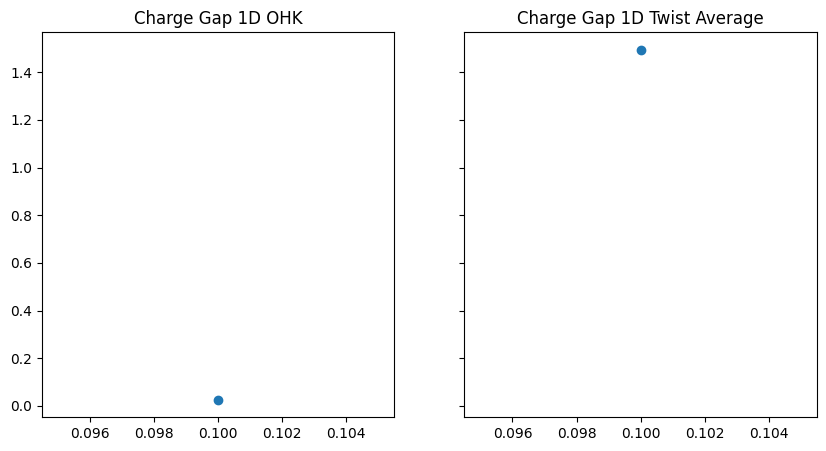

In [134]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

charge_gap_list_OHK = np.zeros(shape=(len(U_list), len(mu_list)))
charge_gap_list_twist = np.zeros_like(charge_gap_list_OHK)

for i, U in enumerate(U_list):
    mu_list = np.array([0.05])#np.linspace(U/2-1, U/2+1, 3)
    for j, mu in enumerate(mu_list):
        charge_gap = ((raw_energy_dat[i,j,1,:] - raw_energy_dat[i,j,0,:]).min() )
        charge_gap_list_OHK[i,j] = charge_gap

        charge_gap_avg = (raw_energy_dat[i,j,1,:] + raw_energy_dat[i,j,2,:]- 2*raw_energy_dat[i,j,0,:]).mean()
        charge_gap_list_twist[i,j] = charge_gap_avg

for j, mu in enumerate(mu_list):
    ax1.scatter(U_list, charge_gap_list_OHK[:,j], label='mu='+str(mu))
    ax2.scatter(U_list, charge_gap_list_twist[:,j], label='mu='+str(mu))
#plt.legend()
#plt.yscale('log')
ax1.set_title('Charge Gap 1D OHK')
ax2.set_title('Charge Gap 1D Twist Average')

Text(0.5, 1.0, 'Charge Gap 1D OBC')

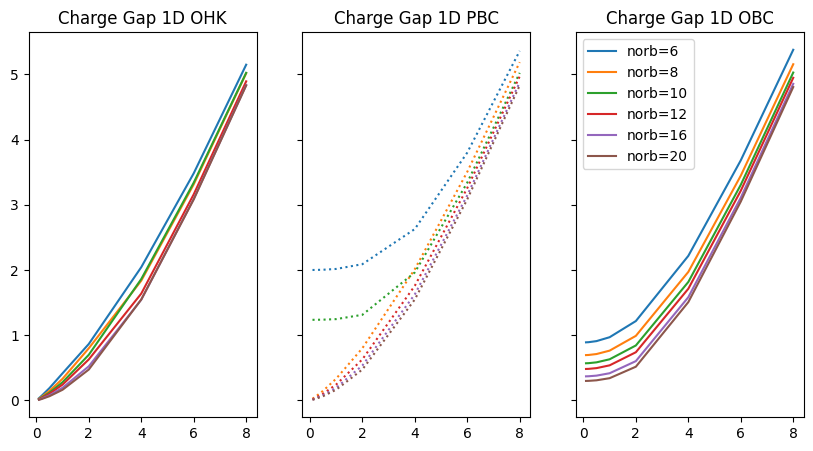

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

charge_gap_list_OHK = np.zeros(shape=(len(U_list), len(norb_list)))
charge_gap_list_twist = np.zeros_like(charge_gap_list_OHK)

for i, U in enumerate(U_list):
    for j, norb in enumerate(norb_list):
        charge_gap = (raw_energy_dat[i,j,1,:] - raw_energy_dat[i,j,0,:]).min()
        charge_gap_list_OHK[i,j] = 2*charge_gap

        charge_gap_avg = 2*(raw_energy_dat[i,j,1,5] - raw_energy_dat[i,j,0,5])
        charge_gap_list_twist[i,j] = charge_gap_avg

for j, norb in enumerate(norb_list):
    ax1.plot(U_list, charge_gap_list_OHK[:,j], label='norb='+str(norb))
    ax2.plot(U_list, charge_gap_list_twist[:,j], label='norb='+str(norb), linestyle=':')
    ax3.plot(U_list, obc_gap[:, j], label='norb='+str(norb))
plt.legend()
#plt.yscale('log')
ax1.set_title('Charge Gap 1D OHK')
ax2.set_title('Charge Gap 1D PBC')
ax3.set_title('Charge Gap 1D OBC')

In [ ]:
import matplotlib.cm as cm

cmap = plt.get_cmap('tab10')

for j, norb in enumerate(norb_list):
    color = cmap(j % 10)  # Ensures we cycle through the 'tab10' colormap
    plt.plot(U_list, charge_gap_list_OHK[:, j], label='norb=' + str(norb), color=color)
    plt.plot(U_list, charge_gap_list_twist[:, j], linestyle=':', color=color)


plt.xlabel("U")
plt.ylabel("Charge gap")
plt.legend()

In [ ]:


for i, norb in enumerate(norb_list): 
    plt.scatter(U_list, twist_avg_energy[:, i]/2, label='norb='+str(norb))
    
plt.title("DMRG for 1D Hubbard")
plt.xlabel("U")
plt.ylabel("Charge Gap")
#plt.yscale('log')
plt.legend()